In [ ]:
!pip install face_recognition

In [1]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

from random import randint
import time
import cv2

In [10]:
def add_user():
    name = input("Enter User name: ")
    image = 

SyntaxError: invalid syntax (Temp/ipykernel_13416/3106959315.py, line 3)

In [11]:
add_user()

NameError: name 'add_user' is not defined

In [2]:
def verified_user():
    delay = randint(0, 5)
    time.sleep(delay)
    cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    return frame

In [3]:
# Load a sample picture and learn how to recognize it.
omesh_image = face_recognition.load_image_file("Omesh.jpg")
omesh_encoding = face_recognition.face_encodings(omesh_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    omesh_encoding,
]
known_face_names = [
    "Omesh",
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 1 images.


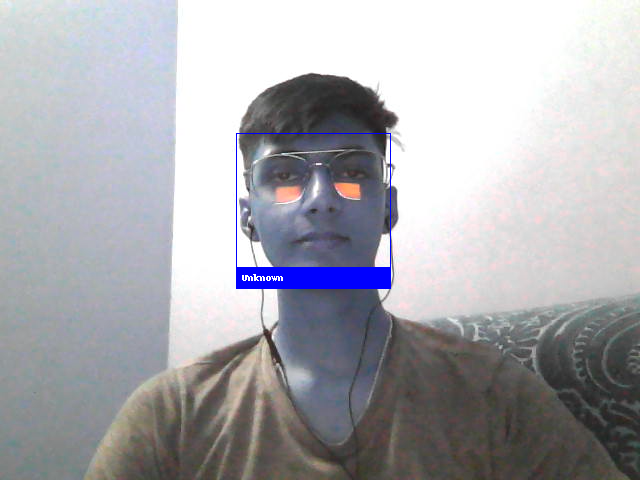

In [4]:
unknown_image = verified_user()

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)